Page View Time Series Visualizer


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/FreeCodeCamp/Python Certification - Projects/fcc-forum-pageviews.csv", 
                 parse_dates = ['date'], index_col = ['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [8]:
#Clean Data
df = df[
        (df['value']>= df['value'].quantile(0.025)) &
        (df['value']<= df['value'].quantile(0.975))
]
df.head()

,value
date,
2016-06-20,28508
2016-06-21,26805
2016-06-29,27734
2016-07-01,28372
2016-07-03,27011


In [17]:
#Line plot
def draw_line_plot():
  fig, ax = plt.subplots(figsize=(16,8))
  ax.plot(df.index, df['value'], 'r', linewidth=1)

  ax.set_title('Daily FreeCodeCamp Forum Page Views')
  ax.set_xlabel('Date')
  ax.set_ylabel('Page Views')

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig

In [23]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None
    df['month'] = df.index.month
    df['year'] = df.index.year
    bar_df = df.groupby(['year', 'month'])['value'].mean()
    bar_df = bar_df.unstack()

    # Draw bar plot
    fig = bar_df.plot.bar(legend=True, figsize=(16,8), 
                          ylabel='Average Page Views per month', 
                          xlabel='Years').figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 
                'June', 'July', 'August', 'September', 'November', 'December'])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [34]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    axes[0] = sns.boxplot(df_box['year'], df_box['value'], ax=axes[0])
    axes[1] = sns.boxplot(df_box['month'], df_box['value'], ax=axes[1])

    axes[0].set_title('Year Box-plot')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    axes[1].set_title('Monthly box-plot')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

Main

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


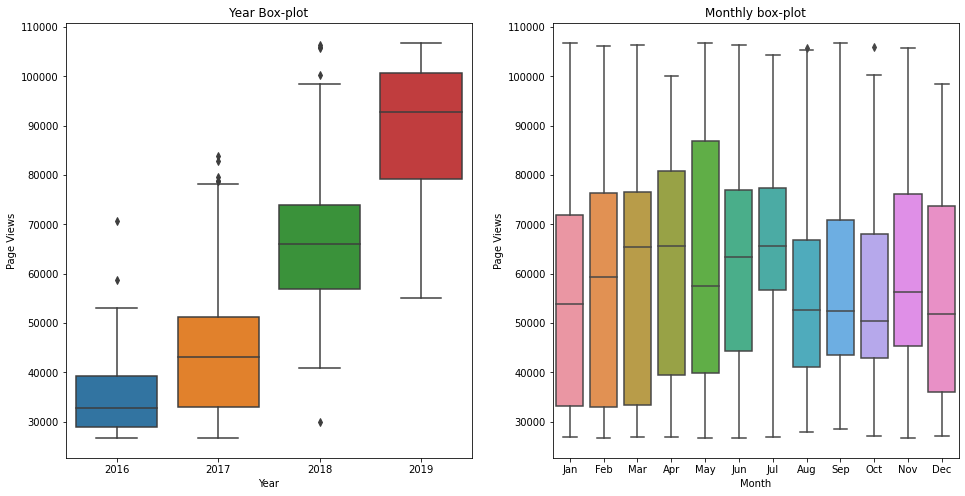

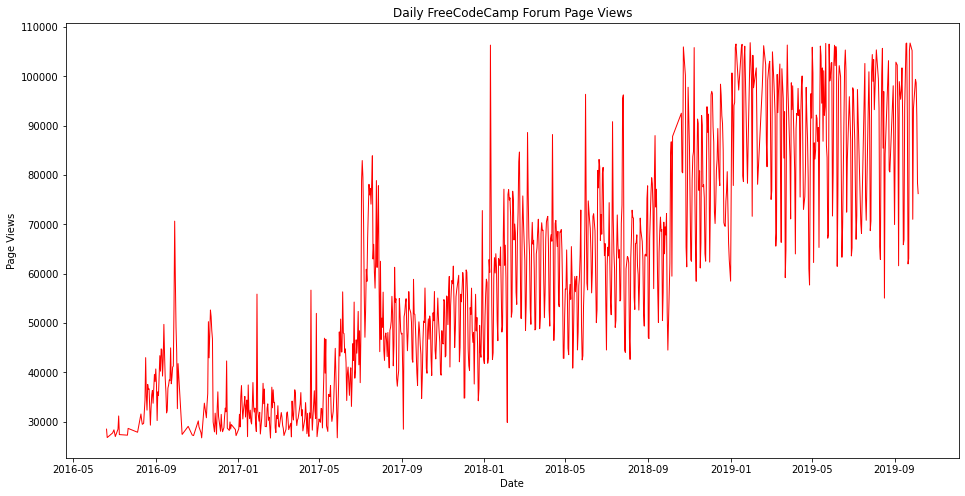

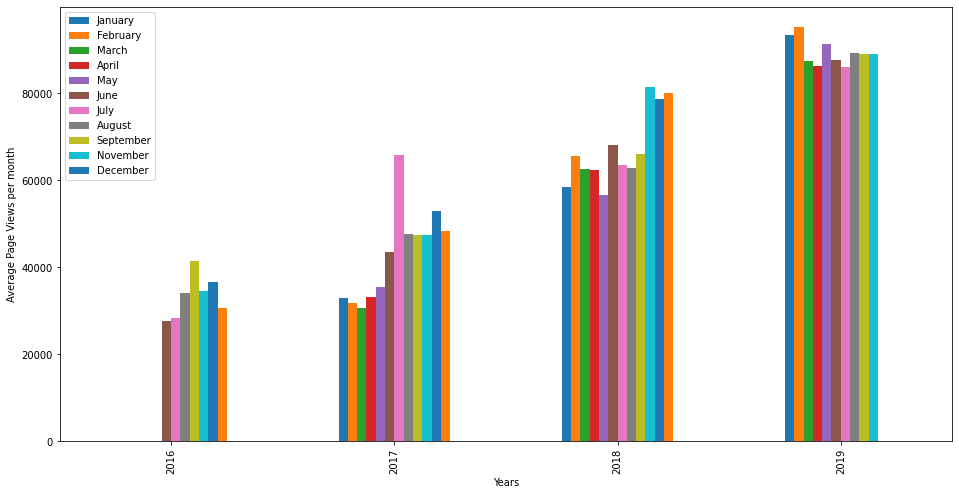

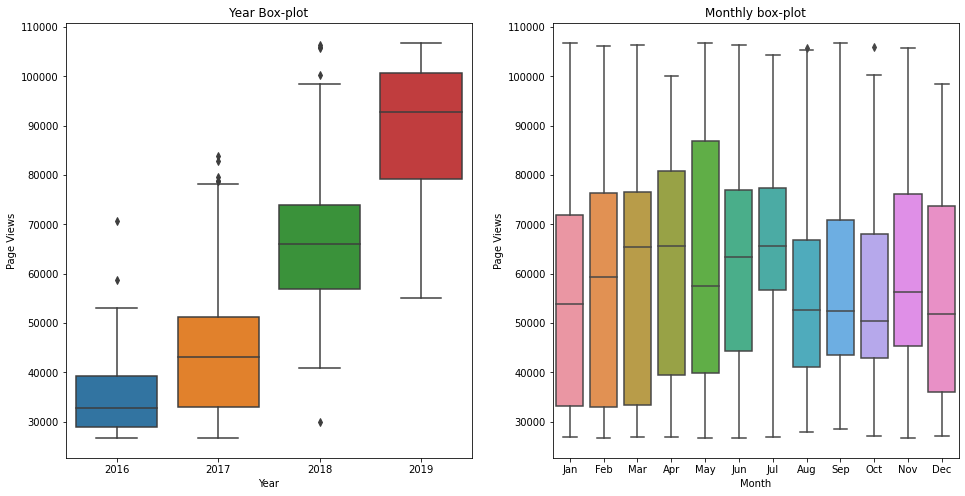

In [35]:
# Test your function by calling it here
draw_line_plot()
draw_bar_plot()
draw_box_plot()